In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal, pointbiserialr
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
flight_data = pd.read_csv('Clean_Dataset.csv')
flight_data.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [3]:
flight_data.drop('Unnamed: 0', axis = 1, inplace = True)
flight_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df = flight_data.copy()
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


# Data Preprocessing

In [6]:
# creating a new variable 'source_dest' using the source and destination data
df['source_dest'] = df['source_city'] + 'To' + df['destination_city']
df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_dest
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,DelhiToMumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,DelhiToMumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,DelhiToMumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,DelhiToMumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,DelhiToMumbai
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955,DelhiToMumbai
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060,DelhiToMumbai
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060,DelhiToMumbai
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954,DelhiToMumbai
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954,DelhiToMumbai


In [7]:
# making new categories from days left variable by considering weeks
df['weeks_left'] = [0] * len(df)
for i in range(len(df)):
    if df['days_left'][i] <= 7:
        df['weeks_left'][i] = 'w1'
    elif df['days_left'][i] > 7 and df['days_left'][i] <= 14:
        df['weeks_left'][i] = 'w2'
    elif df['days_left'][i] > 14 and df['days_left'][i] <= 21:
        df['weeks_left'][i] = 'w3'
    elif df['days_left'][i] > 21 and df['days_left'][i] <= 28:
        df['weeks_left'][i] = 'w4'
    elif df['days_left'][i] > 28 and df['days_left'][i] <= 35:
        df['weeks_left'][i] = 'w5'
    elif df['days_left'][i] > 35 and df['days_left'][i] <= 42:
        df['weeks_left'][i] = 'w6'
    else:
        df['weeks_left'][i] = 'w7'

df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_dest,weeks_left
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,DelhiToMumbai,w1
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,DelhiToMumbai,w1
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,DelhiToMumbai,w1
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,DelhiToMumbai,w1
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,DelhiToMumbai,w1
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955,DelhiToMumbai,w1
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060,DelhiToMumbai,w1
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060,DelhiToMumbai,w1
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954,DelhiToMumbai,w1
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954,DelhiToMumbai,w1


In [8]:
# encode the 'flight' variable using their frequency (flight_demand = high, medium, low)
# only used for factor analysis and clustering
flight_dic = dict(df['flight'].value_counts())
df['flight_demand'] = df['flight'].copy()

for key, val in flight_dic.items():
    if val >= 1000:
        df['flight_demand'].replace(key, 'h', inplace = True) # high
    elif val < 200:
        df['flight_demand'].replace(key, 'l', inplace = True) # low
    else:
        df['flight_demand'].replace(key, 'm', inplace = True) # medium

#df.head()

In [9]:
# taking days_left variable as a categorical variable
df['days_left'] = df['days_left'].astype(str)

In [10]:
len(df['flight'].unique()) # unique categories in flight variable

1561

In [11]:
# getting the training set before doing the analysis
# train set test set split
from sklearn.model_selection import train_test_split

X = df.drop('price', axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train['price'] = y_train
df = X_train.copy()

df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,source_dest,weeks_left,flight_demand,price
148417,Air_India,AI-424,Kolkata,Afternoon,one,Morning,Chennai,Economy,19.42,6,KolkataToChennai,w1,m,13524
36879,Indigo,6E-2193,Delhi,Afternoon,two_or_more,Night,Chennai,Economy,7.00,13,DelhiToChennai,w2,l,9940
274531,Air_India,AI-768,Kolkata,Afternoon,one,Afternoon,Chennai,Business,21.17,44,KolkataToChennai,w7,h,55983
166397,Vistara,UK-876,Hyderabad,Night,one,Early_Morning,Bangalore,Economy,10.25,11,HyderabadToBangalore,w2,h,7927
272722,Vistara,UK-774,Kolkata,Night,one,Night,Chennai,Business,26.50,5,KolkataToChennai,w1,h,55502
183550,Vistara,UK-826,Chennai,Afternoon,one,Evening,Delhi,Economy,5.58,24,ChennaiToDelhi,w4,h,5206
47422,Vistara,UK-877,Mumbai,Morning,one,Afternoon,Delhi,Economy,4.92,24,MumbaiToDelhi,w4,m,5232
255047,Vistara,UK-814,Bangalore,Night,one,Evening,Kolkata,Business,22.42,35,BangaloreToKolkata,w5,h,62188
200793,GO_FIRST,G8-451,Chennai,Night,one,Early_Morning,Kolkata,Economy,8.42,31,ChennaiToKolkata,w5,l,7312
37174,Air_India,AI-887,Delhi,Early_Morning,one,Early_Morning,Chennai,Economy,24.33,15,DelhiToChennai,w3,m,4251


In [12]:
df.reset_index(inplace=True)

In [13]:
df.drop('index', axis=1, inplace=True)

df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,source_dest,weeks_left,flight_demand,price
0,Air_India,AI-424,Kolkata,Afternoon,one,Morning,Chennai,Economy,19.42,6,KolkataToChennai,w1,m,13524
1,Indigo,6E-2193,Delhi,Afternoon,two_or_more,Night,Chennai,Economy,7.00,13,DelhiToChennai,w2,l,9940
2,Air_India,AI-768,Kolkata,Afternoon,one,Afternoon,Chennai,Business,21.17,44,KolkataToChennai,w7,h,55983
3,Vistara,UK-876,Hyderabad,Night,one,Early_Morning,Bangalore,Economy,10.25,11,HyderabadToBangalore,w2,h,7927
4,Vistara,UK-774,Kolkata,Night,one,Night,Chennai,Business,26.50,5,KolkataToChennai,w1,h,55502
5,Vistara,UK-826,Chennai,Afternoon,one,Evening,Delhi,Economy,5.58,24,ChennaiToDelhi,w4,h,5206
6,Vistara,UK-877,Mumbai,Morning,one,Afternoon,Delhi,Economy,4.92,24,MumbaiToDelhi,w4,m,5232
7,Vistara,UK-814,Bangalore,Night,one,Evening,Kolkata,Business,22.42,35,BangaloreToKolkata,w5,h,62188
8,GO_FIRST,G8-451,Chennai,Night,one,Early_Morning,Kolkata,Economy,8.42,31,ChennaiToKolkata,w5,l,7312
9,Air_India,AI-887,Delhi,Early_Morning,one,Early_Morning,Chennai,Economy,24.33,15,DelhiToChennai,w3,m,4251


In [14]:
## split the data into numeriacal and categorical data to handle them sperately

num_data= df.select_dtypes(include=['int64', 'float64'])
cat_data= df.select_dtypes(include=['object'])
cat_data.drop(columns = ['weeks_left', 'flight_demand', 'source_dest'], axis = 1, inplace = True)

print('numerical data columns =', num_data.columns)
print('categorical data columns =', cat_data.columns)

numerical data columns = Index(['duration', 'price'], dtype='object')
categorical data columns = Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left'],
      dtype='object')


In [15]:
for col in cat_data.columns:
    print(col)
    for i in cat_data[col].unique():
        if col != 'flight':
            print(i,'=', sum(cat_data[col] == i))
    print('\n')    

airline
Air_India = 64558
Indigo = 34468
Vistara = 102452
GO_FIRST = 18556
SpiceJet = 7240
AirAsia = 12848


flight


source_city
Kolkata = 37182
Delhi = 49067
Hyderabad = 32569
Chennai = 30952
Mumbai = 48711
Bangalore = 41641


departure_time
Afternoon = 38160
Night = 38227
Morning = 57137
Early_Morning = 53509
Evening = 52063
Late_Night = 1026


stops
one = 200570
two_or_more = 10665
zero = 28887


arrival_time
Morning = 50146
Night = 73438
Afternoon = 30456
Early_Morning = 12330
Evening = 62637
Late_Night = 11115


destination_city
Chennai = 32318
Bangalore = 40989
Delhi = 45814
Kolkata = 39601
Mumbai = 47309
Hyderabad = 34091


class
Economy = 165350
Business = 74772


days_left
6 = 4575
13 = 5139
44 = 5118
11 = 5137
5 = 4275
24 = 5204
35 = 5072
31 = 5244
15 = 5008
25 = 5304
3 = 3370
10 = 4707
12 = 5103
23 = 5094
29 = 5123
17 = 5164
30 = 5175
2 = 3234
14 = 5072
36 = 5192
47 = 4932
9 = 4512
34 = 5136
48 = 4866
42 = 5166
21 = 5094
40 = 5236
1 = 1565
49 = 4979
41 = 5246
28 = 5227
16 =

# Univariate analysis

## Numerical data

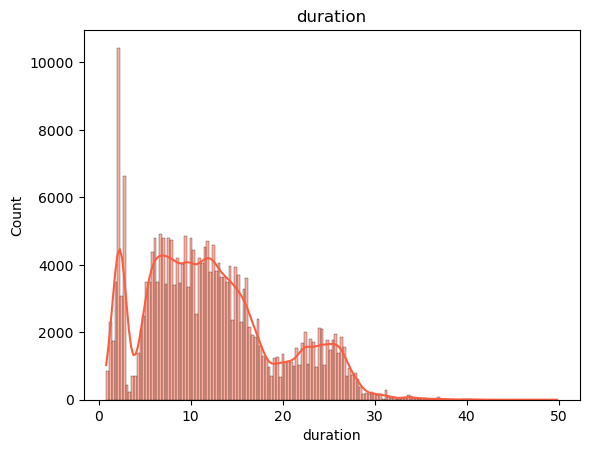

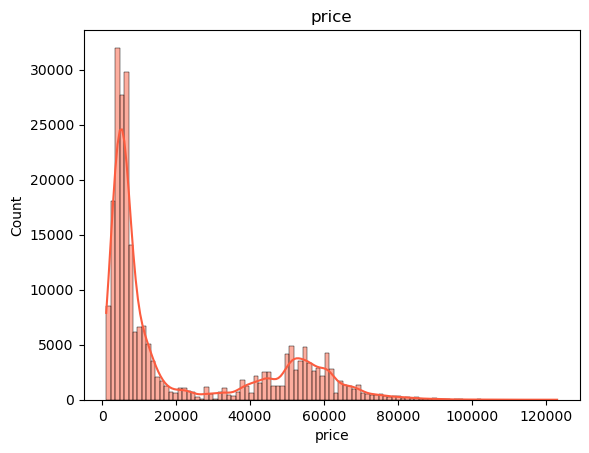

In [16]:
for col in num_data.columns:
    sns.histplot(data = df, x = col, kde = True, color = '#fc5c3f').set_title(col)
    plt.show()

In [17]:
## function to check for the outliers
def removal_box_plot(df, column):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    # IQR
    Q1 = np.percentile(df[column], 25, method='midpoint')
    Q3 = np.percentile(df[column], 75, method='midpoint')
    IQR = Q3 - Q1

    # upper and lower limit of the Box-plot
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
 
    removed_outliers = df[(df[column] <= upper) & (df[column] >= lower)]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    print('number of outliers: ', len(df) - len(removed_outliers))

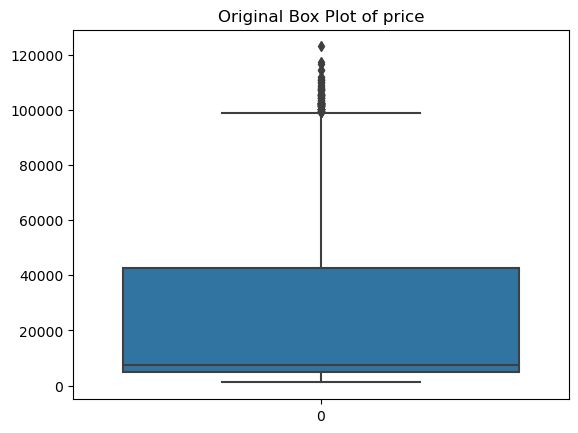

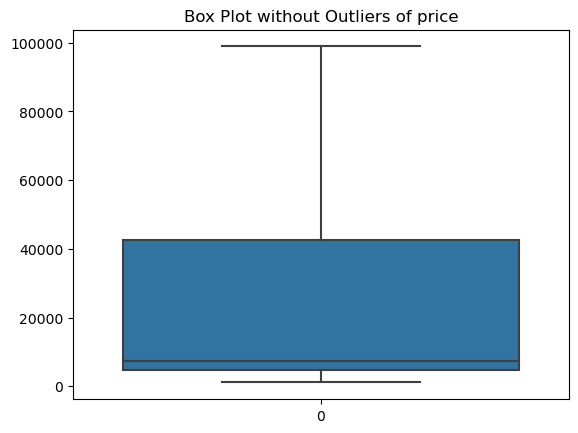

number of outliers:  92


In [18]:
removal_box_plot(df, 'price') # boxplot of price with and without outliers 

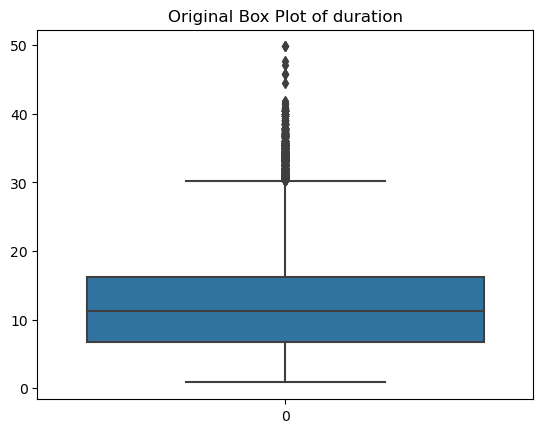

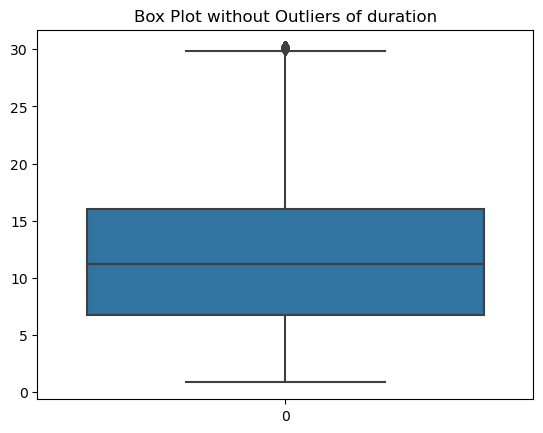

number of outliers:  1606


In [19]:
removal_box_plot(df, 'duration') # boxplot of duration with and without outliers 

* **There are only 92 outliers for the flight price variable**
* **There are only 1606 outliers for the flight price variable** 

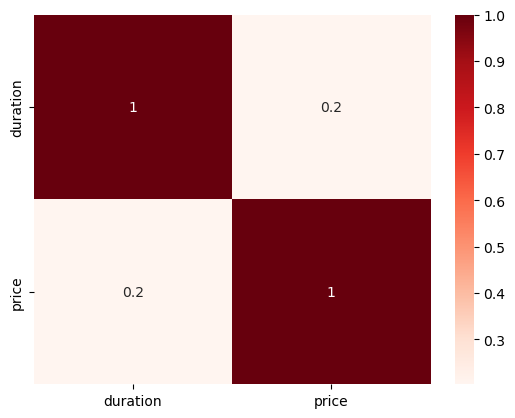

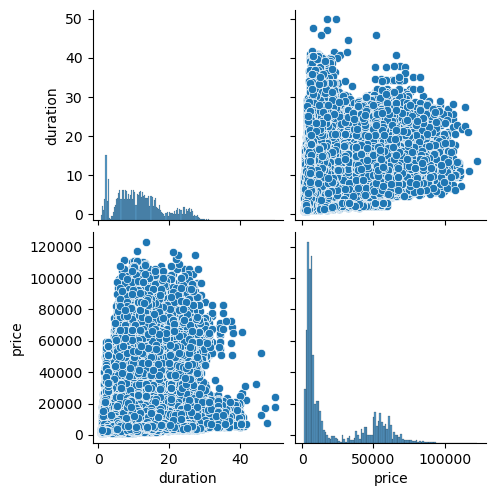

In [20]:
#used
sns.heatmap(num_data.corr(), annot = True, cmap="Reds")
sns.pairplot(num_data)
plt.show()

## Categorical data

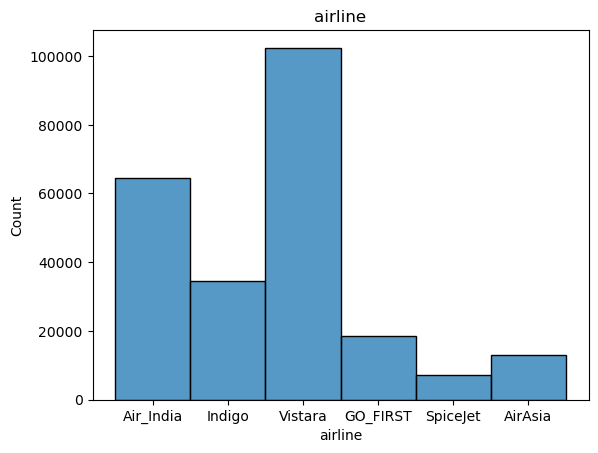

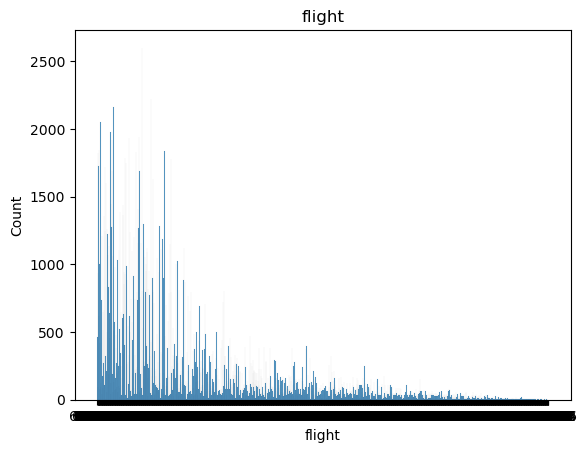

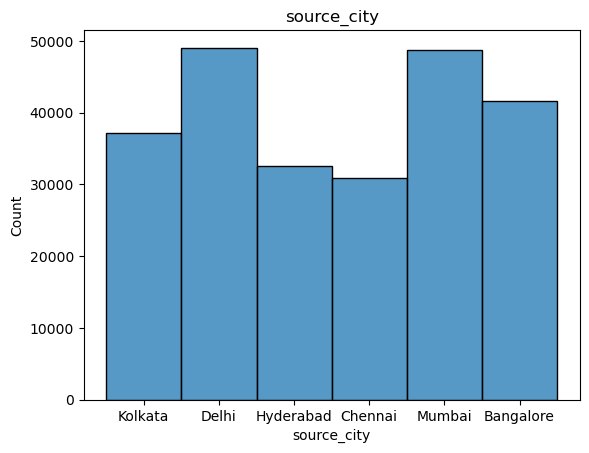

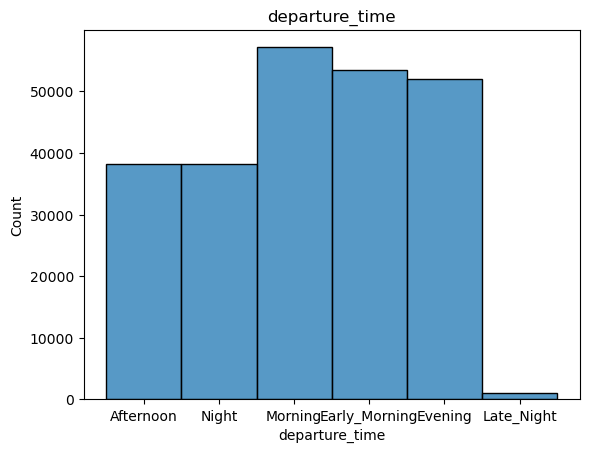

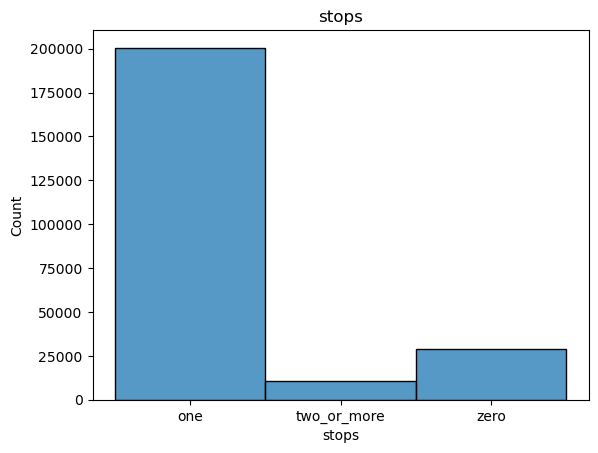

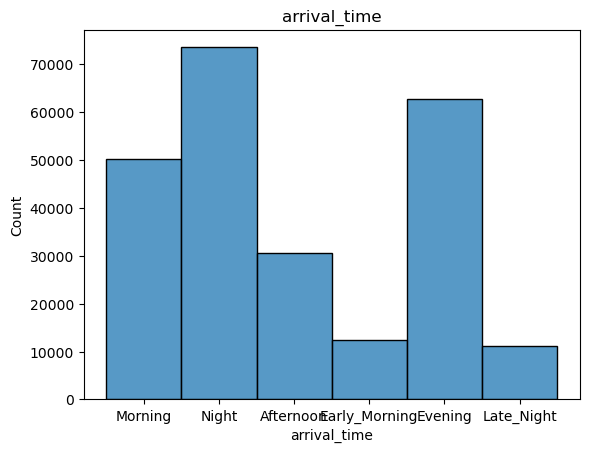

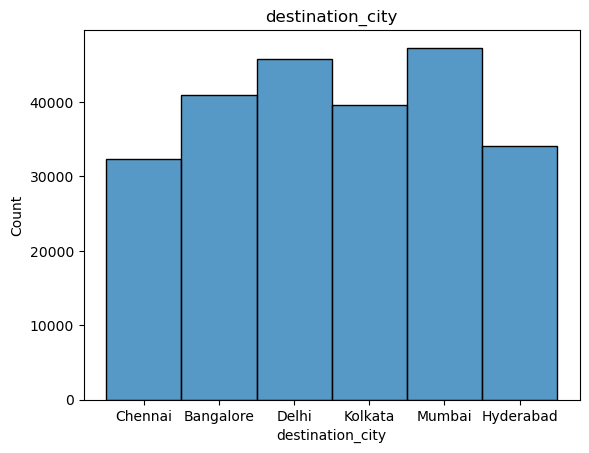

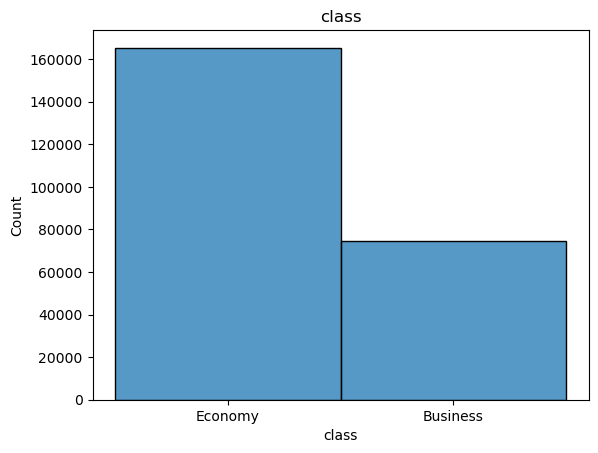

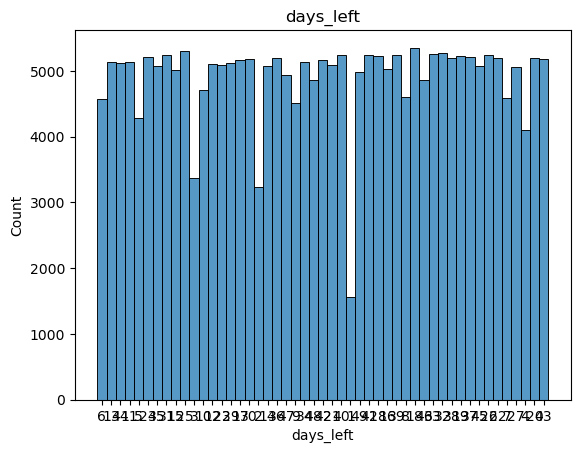

In [21]:
for col in cat_data.columns:
    sns.histplot(data = df, x = col).set_title(col)
    plt.show()

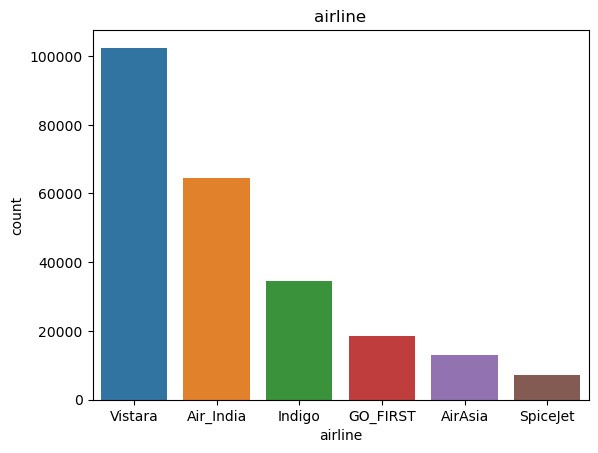

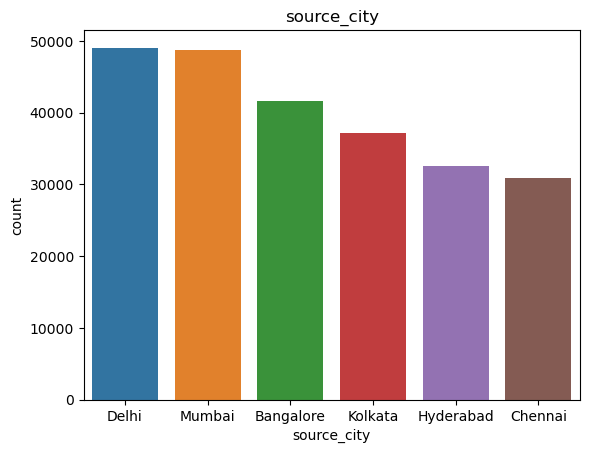

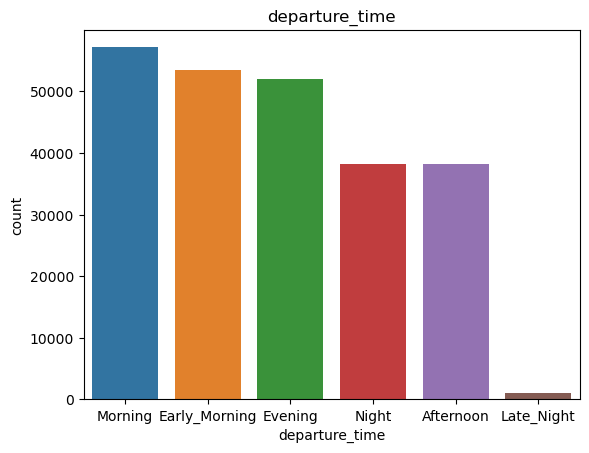

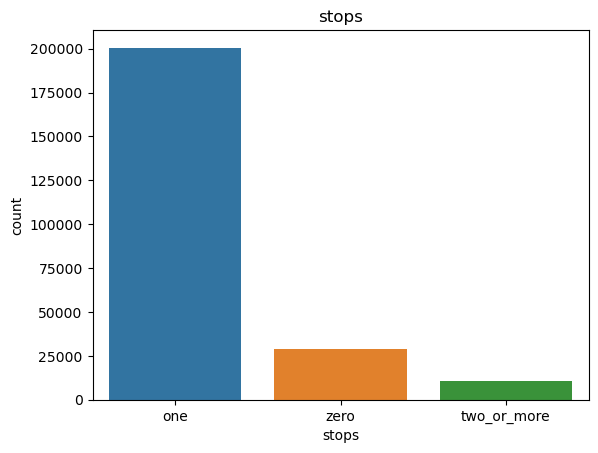

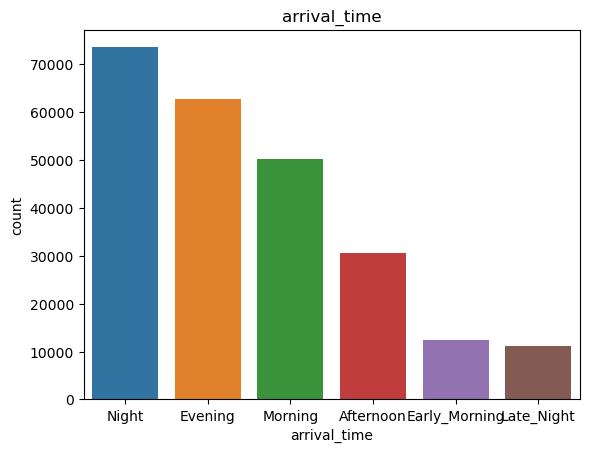

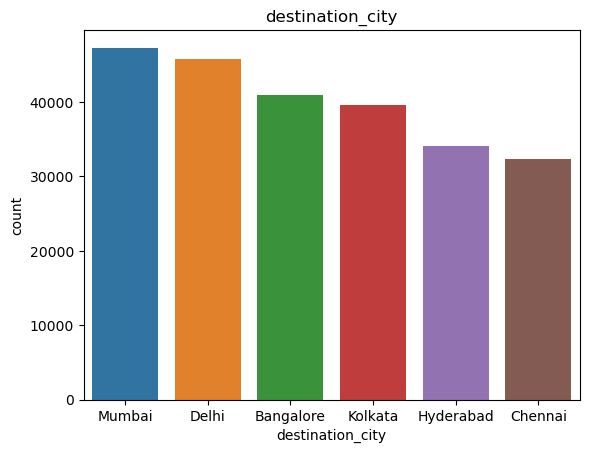

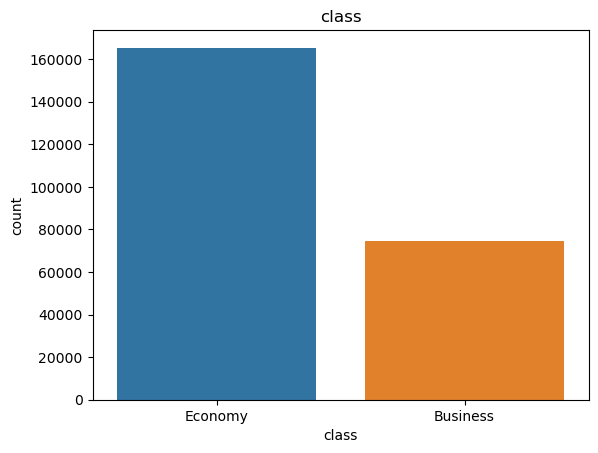

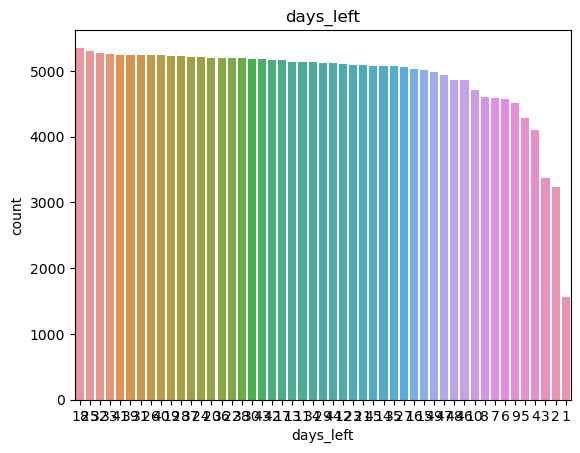

In [22]:
for col in cat_data.columns:
    if col != 'flight':
        sns.countplot(x = col, data = cat_data, order = cat_data[col].value_counts().index).set_title(col)
        plt.show()

Text(0.5, 1.0, 'days_left')

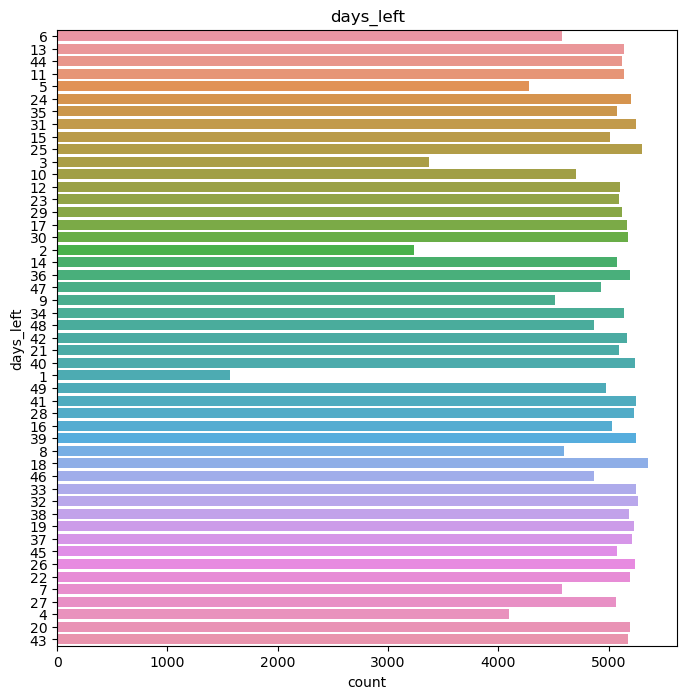

In [23]:
## used
plt.figure(figsize=(8, 8))
sns.countplot(y = 'days_left', data = cat_data).set_title('days_left')

Text(0.5, 1.0, 'class')

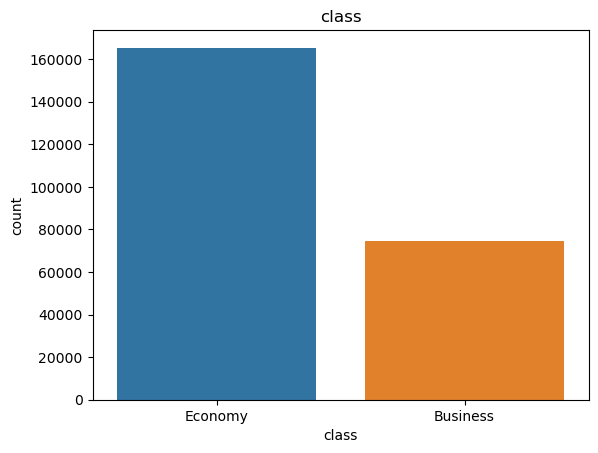

In [24]:
# used
sns.countplot(x = 'class', data = cat_data, order = cat_data['class'].value_counts().index).set_title('class')

Text(0.5, 1.0, 'airline')

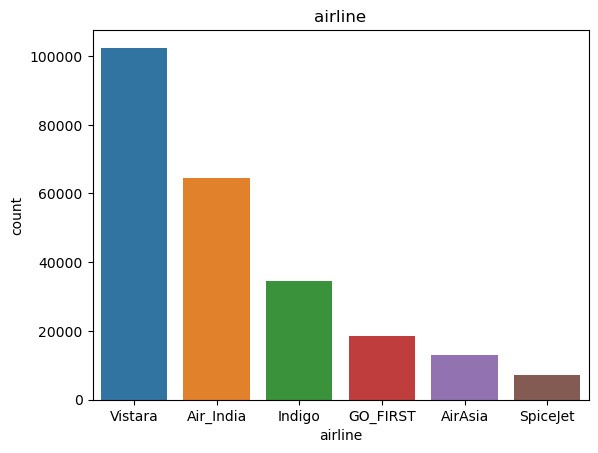

In [25]:
# used
sns.countplot(x = 'airline', data = cat_data, order = cat_data['airline'].value_counts().index).set_title('airline')

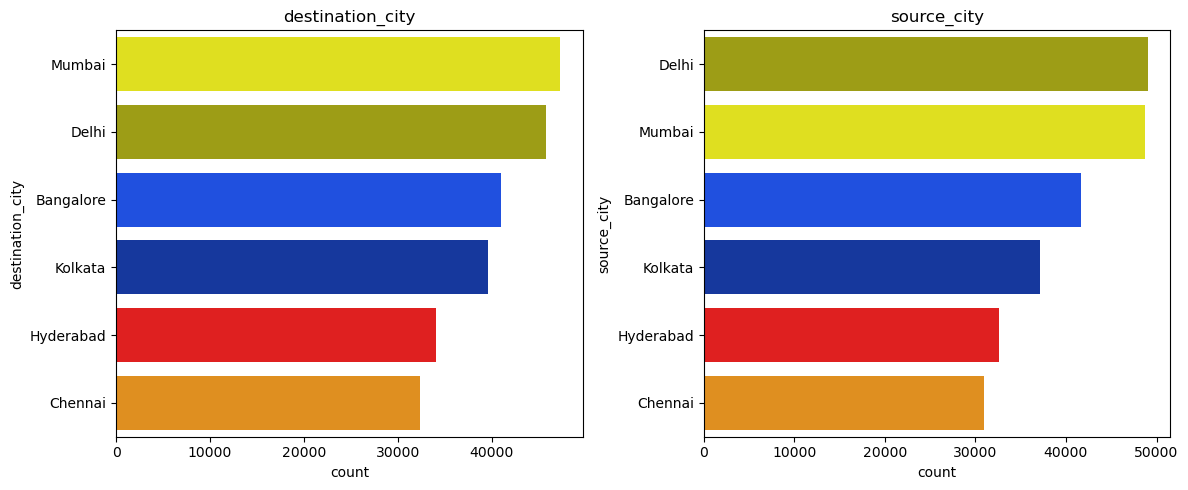

In [26]:
# used
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(y = 'destination_city', data = cat_data, order = cat_data['destination_city'].value_counts().index, palette=['#ffff00', '#b3b300', '#0040ff', '#002db3', '#ff0000', '#ff9400']).set_title('destination_city')

plt.subplot(1, 2, 2)
sns.countplot(y = 'source_city', data = cat_data, order = cat_data['source_city'].value_counts().index, palette=['#b3b300', '#ffff00', '#0040ff', '#002db3', '#ff0000', '#ff9400']).set_title('source_city')

plt.tight_layout()
plt.show()

# Mutivariate analysis

In [27]:
# Kruskal-Wallis test to check the association between categoriacal variables and the price variable
for col in cat_data.columns:
    print(col)
    if col != 'flight_demand' and col != 'weeks_left':
        groups = [df['price'][cat_data[col] == i] for i in cat_data[col].unique()]
        statistic, p_value = kruskal(*groups)
        print("Kruskal-Wallis H-statistic:", statistic)
        print("P-value:", p_value, '\n')

airline
Kruskal-Wallis H-statistic: 75544.42779720634
P-value: 0.0 

flight
Kruskal-Wallis H-statistic: 93875.15658503404
P-value: 0.0 

source_city
Kruskal-Wallis H-statistic: 1509.6285681027332
P-value: 0.0 

departure_time
Kruskal-Wallis H-statistic: 1498.2930762682747
P-value: 0.0 

stops
Kruskal-Wallis H-statistic: 16407.688180405916
P-value: 0.0 

arrival_time
Kruskal-Wallis H-statistic: 7249.979731021253
P-value: 0.0 

destination_city
Kruskal-Wallis H-statistic: 1257.6945404286369
P-value: 9.33937198818812e-270 

class
Kruskal-Wallis H-statistic: 154256.25194147314
P-value: 0.0 

days_left
Kruskal-Wallis H-statistic: 23405.58460159389
P-value: 0.0 



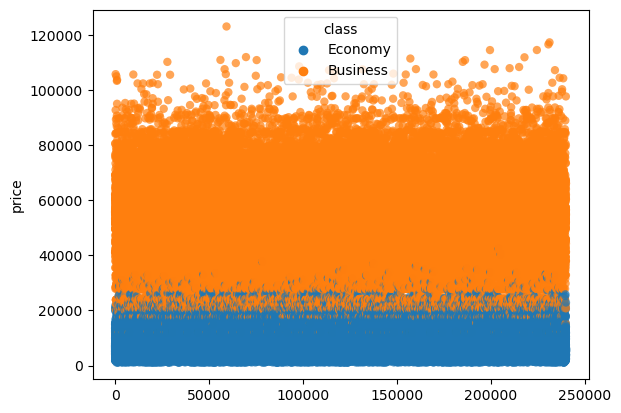

In [28]:
sns.scatterplot(x = df.index, y = 'price', hue = 'class', data = df, linewidth=0, alpha = 0.7)
plt.show()

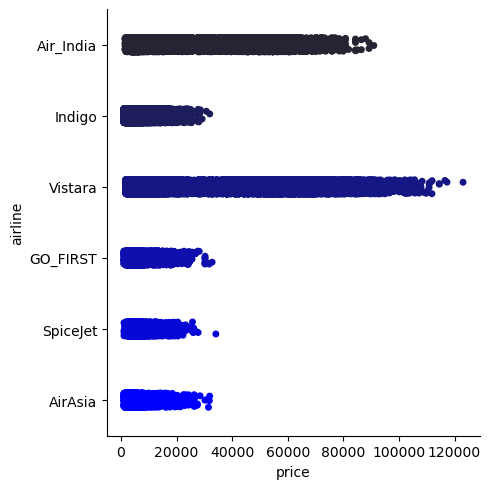

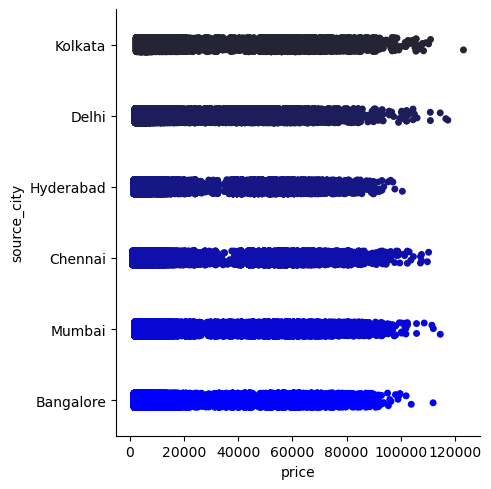

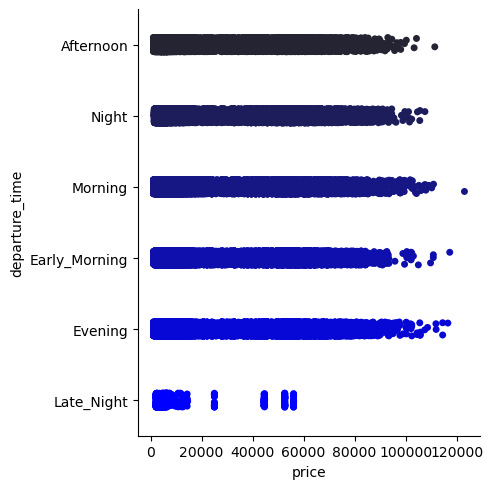

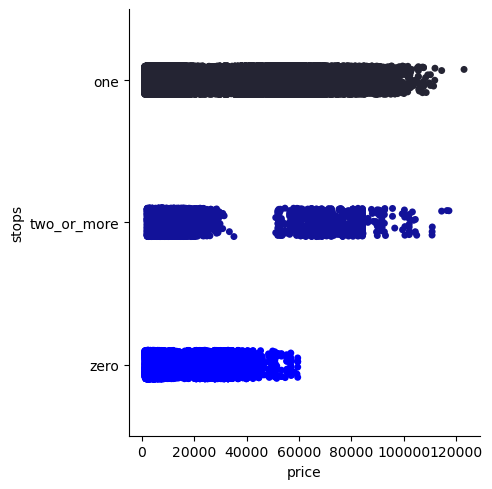

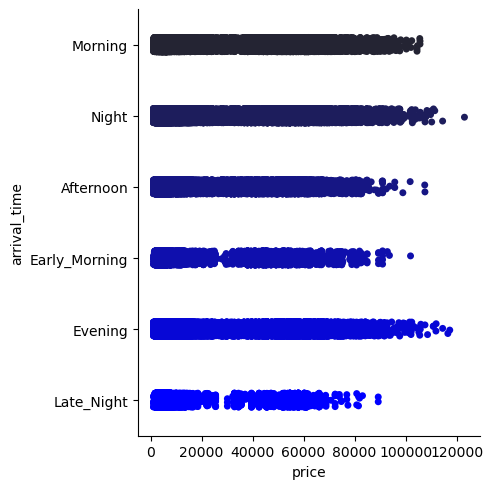

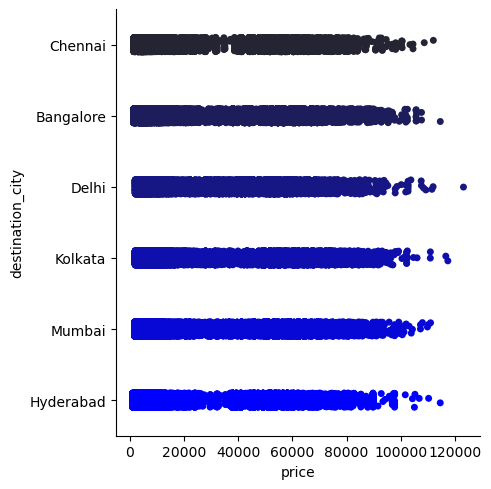

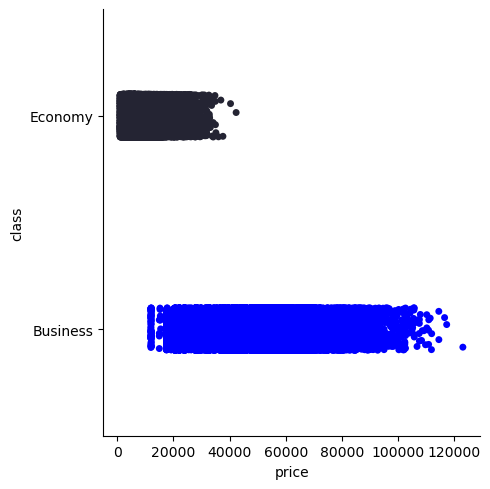

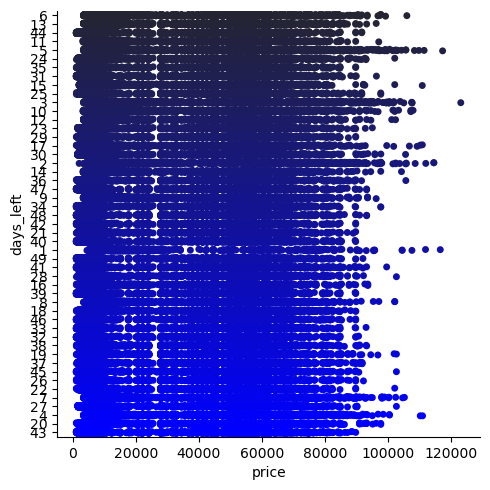

In [29]:
for col in cat_data.columns:
    if col != 'flight':
        g = sns.catplot(
            data=df, x="price", y=col, palette='dark:blue'
        )
        plt.show()

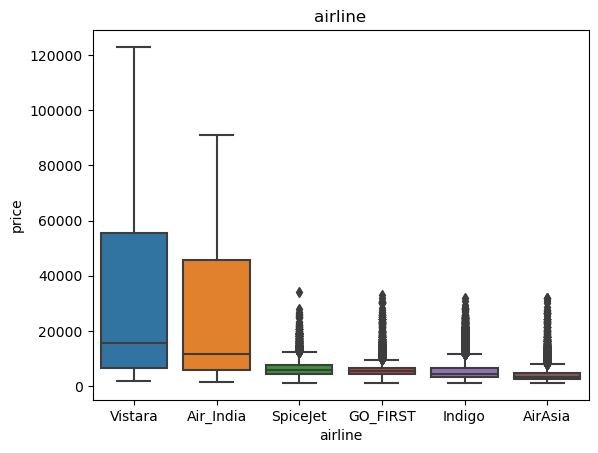

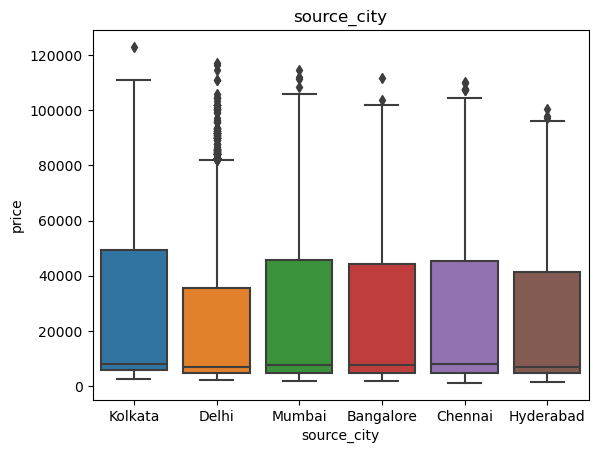

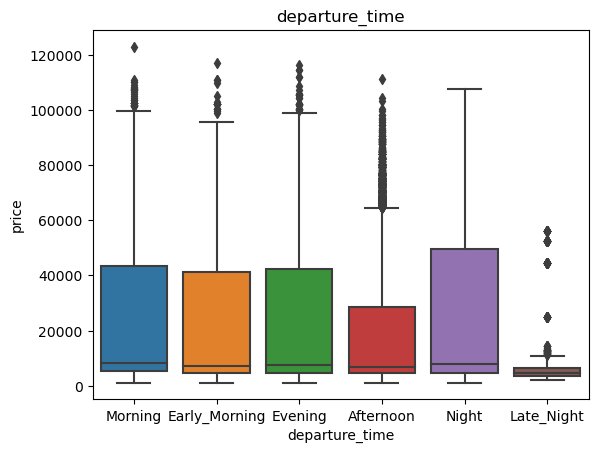

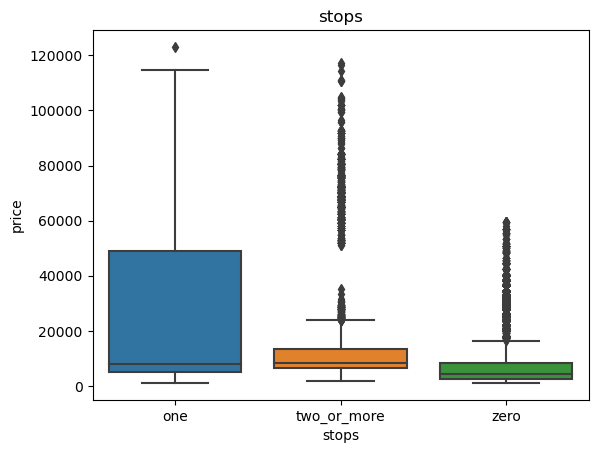

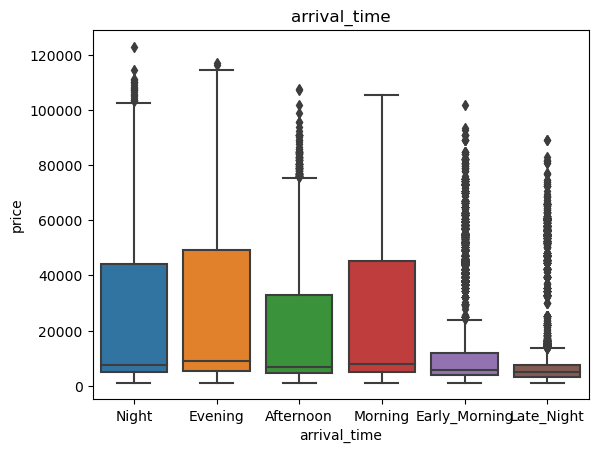

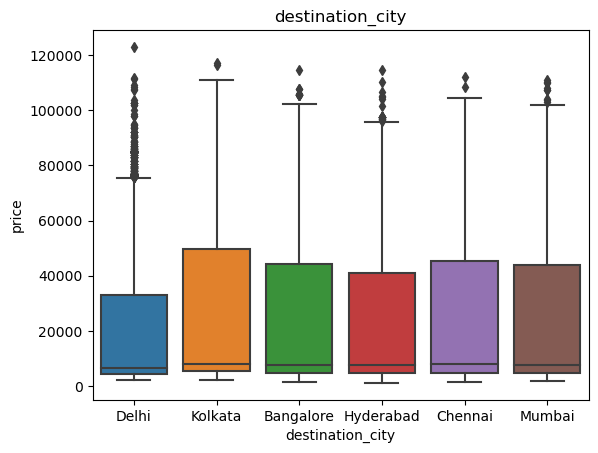

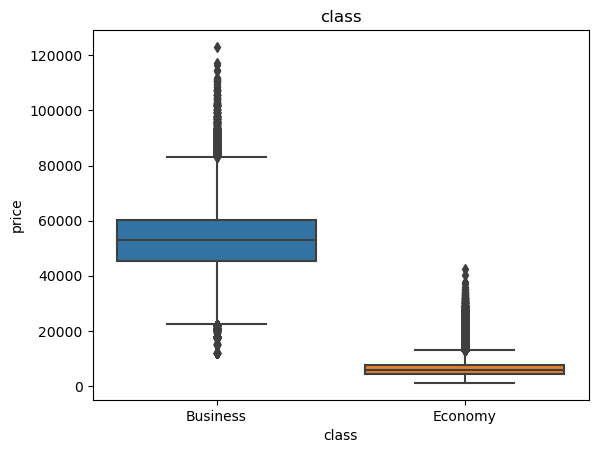

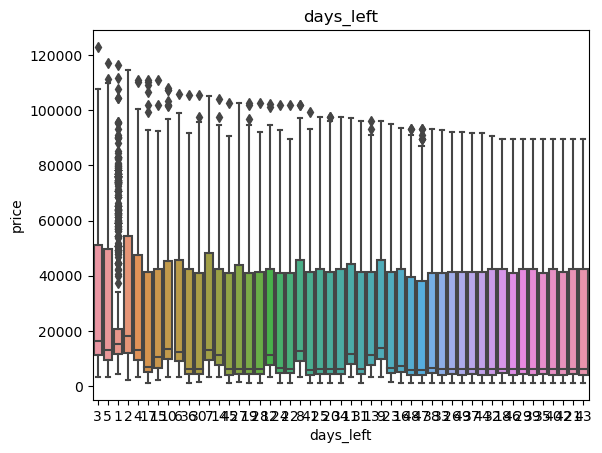

In [30]:
for col in cat_data.columns:
    if col != 'flight':
        sns.boxplot(y = "price", x = col, data = df.sort_values("price", ascending = False)).set_title(col)
        plt.show()

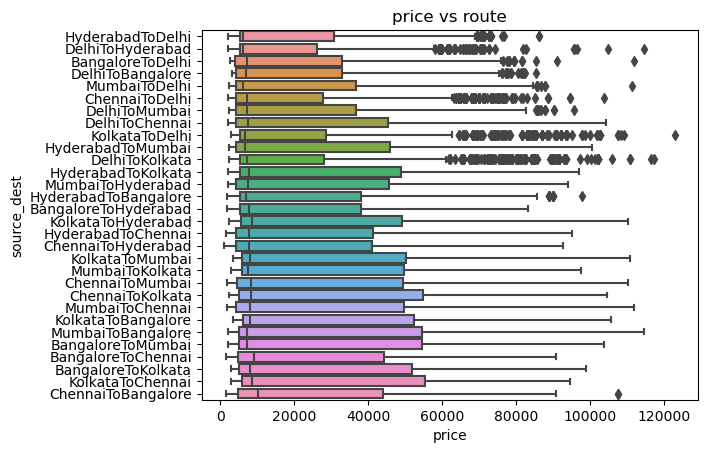

Text(0.5, 1.0, 'duration vs route')

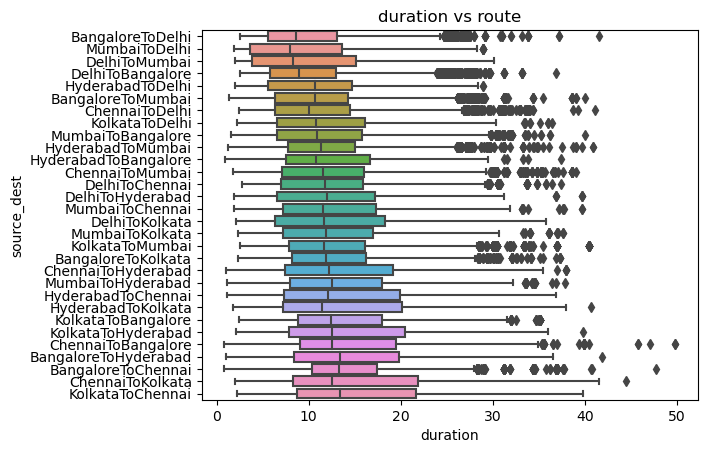

In [31]:
sns.boxplot(x = "price", y = 'source_dest', data = df, order =df[['price', 'source_dest']].groupby(['source_dest']).mean().sort_values(by=['price']).index).set_title("price vs route")
plt.show()
sns.boxplot(x = "duration", y = 'source_dest', data = df, order =df[['duration', 'source_dest']].groupby(["source_dest"]).mean().sort_values(by=['duration']).index).set_title("duration vs route")

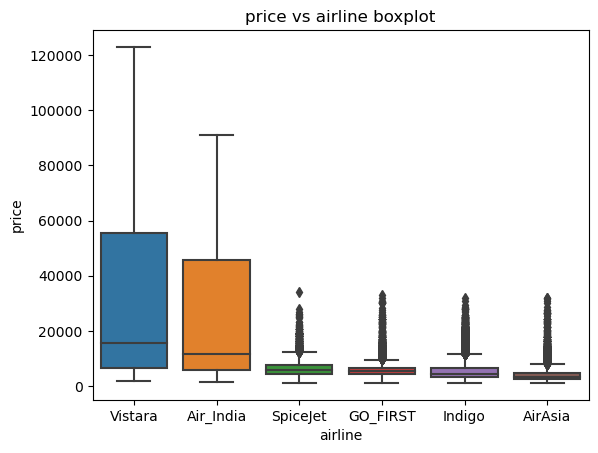

Text(0.5, 1.0, 'class vs airline boxplot')

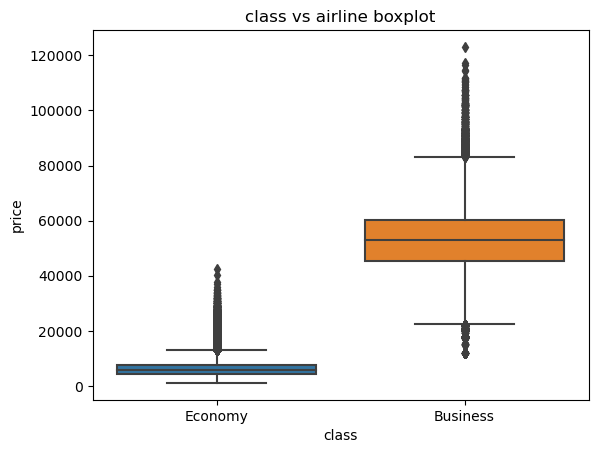

In [32]:
# used
sns.boxplot(y = "price", x = 'airline', data = df.sort_values("price", ascending = False)).set_title('price vs airline boxplot')
plt.show()
sns.boxplot(y = "price", x = 'class', data = df.sort_values("price", ascending = True)).set_title('class vs airline boxplot')

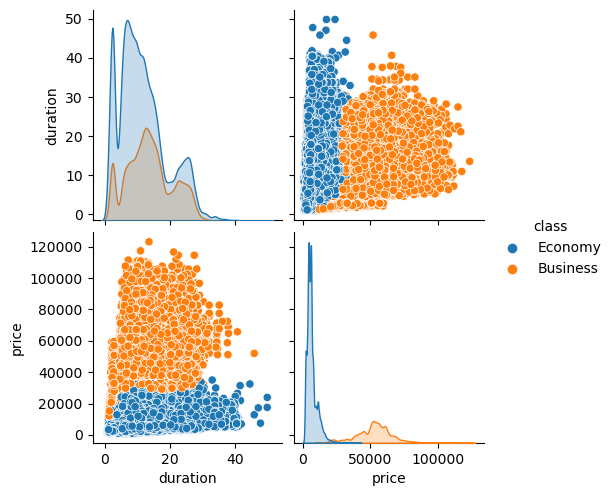

In [33]:
num_data_new = num_data.copy()
num_data_new['class'] = df['class']
sns.pairplot(num_data_new, hue = 'class')

<Axes: xlabel='source_city', ylabel='Percent'>

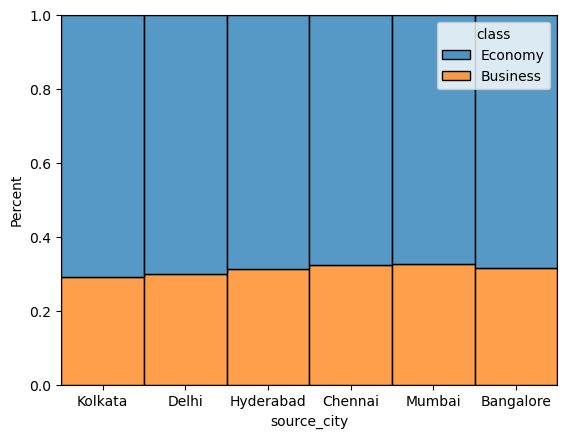

In [34]:
sns.histplot(data=df, x='source_city', hue='class', stat='percent', multiple = 'fill')

<Axes: xlabel='destination_city', ylabel='Percent'>

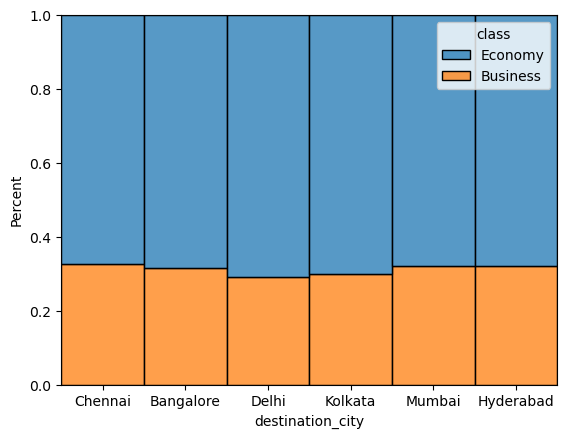

In [35]:
sns.histplot(data=df, x='destination_city', hue='class', stat='percent', multiple = 'fill')

Text(0.5, 1.0, 'stops')

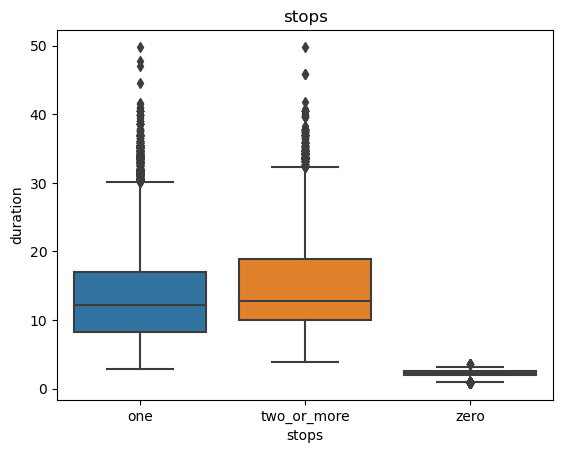

In [36]:
sns.boxplot(y = "duration", x = 'stops', data = df.sort_values("duration", ascending = False)).set_title('stops')

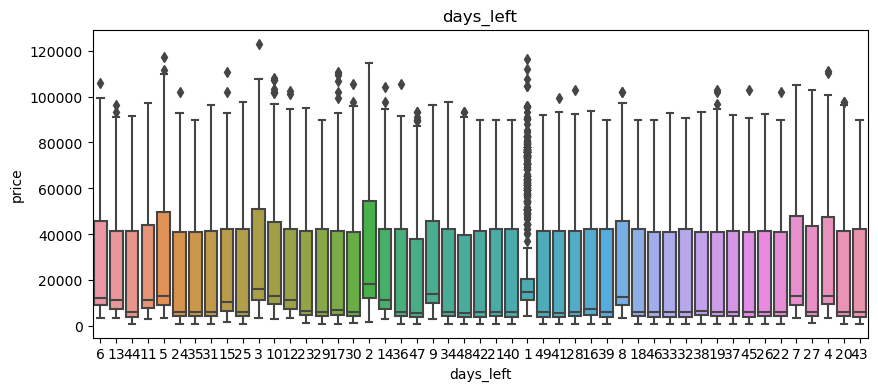

Text(0.5, 1.0, 'days_left')

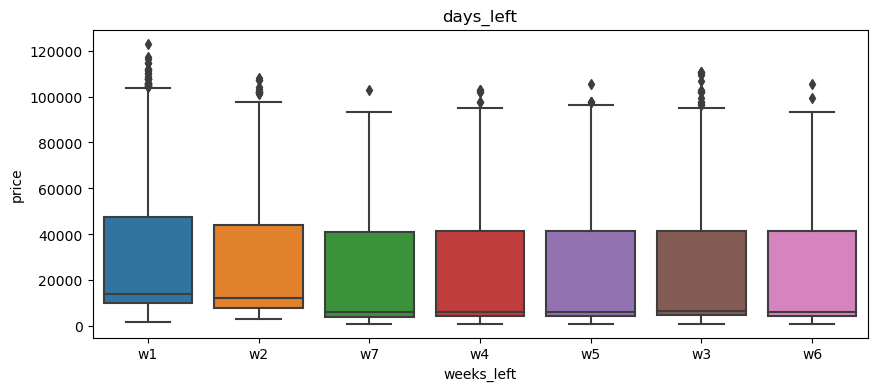

In [37]:
plt.figure(figsize=(10, 4))
sns.boxplot(y = "price", x = 'days_left', data = df).set_title(col)
plt.show()
plt.figure(figsize=(10, 4))
sns.boxplot(y = "price", x = 'weeks_left', data = df).set_title(col)

# Multiple Correspondence Analysis (MCA) and Factor Analysis for Mixed Data (FAMD)

* **Did it in R**
* **We use the processed Weeks_left and flight_demand variables to do the MCA and MFA**
* **for the easiness of interpretting and visualization**

In [46]:
# export the processed dataset to do the MCA and MFA in R (because categories can't have same values in each variable)
# and for the aesiness of visualizations

df_export = df.drop(['days_left', 'source_dest', 'price', 'flight'], axis=1)

m_dict_sc = {'Delhi': 's_D', 'Mumbai': 's_M', 'Bangalore': 's_B', 'Kolkata': 's_K', 'Hyderabad': 's_H', 'Chennai': 's_C'}
m_dict_dest = {'Delhi': 'd_D', 'Mumbai': 'd_M', 'Bangalore': 'd_B', 'Kolkata': 'd_K', 'Hyderabad': 'd_H', 'Chennai': 'd_C'}
m_dict_deptime =  {'Evening': 'd_e', 'Early_Morning': 'd_Em', 'Morning': 'd_m', 'Afternoon': 'd_a', 'Night': 'd_n', 'Late_Night': 'd_Ln'}
m_dict_arrime =  {'Evening': 'a_e', 'Early_Morning': 'a_Em', 'Morning': 'a_m', 'Afternoon': 'a_a', 'Night': 'a_n', 'Late_Night': 'a_Ln'}
m_dict_stops =  {'zero': '0_st', 'one': '1_st', 'two_or_more': '1+_st'}
m_dict_class =  {'Business': 'bus', 'Economy': 'eco'}

df_export['source_city'] = df_export['source_city'].replace(m_dict_sc)
df_export['destination_city'] = df_export['destination_city'].replace(m_dict_dest)
df_export['departure_time'] = df_export['departure_time'].replace(m_dict_deptime)
df_export['arrival_time'] = df_export['arrival_time'].replace(m_dict_arrime)
df_export['stops'] = df_export['stops'].replace(m_dict_stops)
df_export['class'] = df_export['class'].replace(m_dict_class)

df_export.head(10)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,weeks_left,flight_demand
0,Air_India,s_K,d_a,1_st,a_m,d_C,eco,19.42,w1,m
1,Indigo,s_D,d_a,1+_st,a_n,d_C,eco,7.00,w2,l
2,Air_India,s_K,d_a,1_st,a_a,d_C,bus,21.17,w7,h
3,Vistara,s_H,d_n,1_st,a_Em,d_B,eco,10.25,w2,h
4,Vistara,s_K,d_n,1_st,a_n,d_C,bus,26.50,w1,h
5,Vistara,s_C,d_a,1_st,a_e,d_D,eco,5.58,w4,h
6,Vistara,s_M,d_m,1_st,a_a,d_D,eco,4.92,w4,m
7,Vistara,s_B,d_n,1_st,a_e,d_K,bus,22.42,w5,h
8,GO_FIRST,s_C,d_n,1_st,a_Em,d_K,eco,8.42,w5,l
9,Air_India,s_D,d_Em,1_st,a_Em,d_C,eco,24.33,w3,m


In [39]:
df_export.to_csv('MCA_df.csv', index=False)

# Clustering (using kprototype)

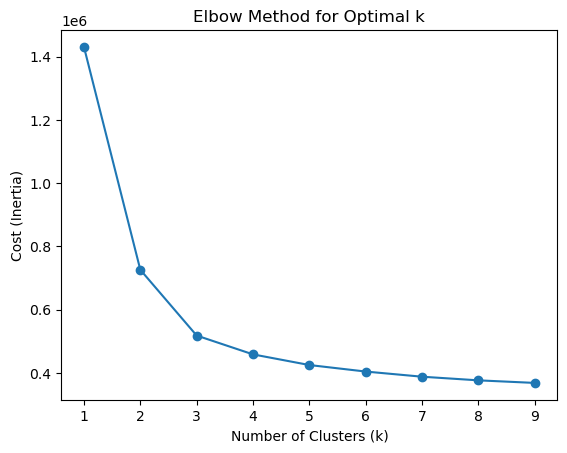

In [48]:
# getting a random sample from the data
np.random.seed(42)
df_export['price'] = df['price'].copy()
df_export_subset = df_export.sample(20000)
#df_export_subset = df_export
df_export_subset_n = df_export_subset.drop('price', axis = 1)

df_mat = df_export_subset_n.to_numpy()

# identify the optimal number of clusters using elbow graph
from kmodes.kprototypes import KPrototypes

# Specify the indices of the categorical features
categorical_indices = [0, 1, 2, 3, 4, 5, 6, 8, 9]
# Initialize an empty list to store the cost (inertia) for each k
costs = []

for k in range(1,10):
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0)
    clusters = kproto.fit_predict(df_mat, categorical=categorical_indices)
    cost = kproto.cost_
    costs.append(cost)

# Plot the elbow graph
plt.plot(range(1,10), costs, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.show()

In [49]:
# cost (sum distance): confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
        x=range(1,10), 
        y=costs, 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_cost_c3 = cost_knee_c3.elbow   
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

elbow at k = 3 clusters


* **looking at the graph, optimal number of clusters is three**

In [42]:
#df_export_subset.drop('Cluster', axis = 1, inplace = True)

In [51]:
# fitting 3 clusters
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=0)
clusters = kproto.fit_predict(df_mat, categorical=categorical_indices)
#df_export_subset['Cluster'] = clusters

In [52]:
df_export_subset['Cluster'] = clusters
df_export_subset.reset_index(inplace = True)
df_export_subset.head(10)

,index,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,weeks_left,flight_demand,price,Cluster
0,108186,Air_India,s_M,d_n,1_st,a_e,d_H,eco,21.83,w2,h,7584,0
1,8960,Indigo,s_B,d_e,1_st,a_Em,d_K,eco,10.75,w4,l,5021,1
2,201351,Indigo,s_M,d_a,1_st,a_n,d_C,eco,7.08,w4,l,5943,2
3,118855,Air_India,s_M,d_n,1_st,a_e,d_H,bus,21.83,w2,h,45693,0
4,8804,AirAsia,s_D,d_Em,1_st,a_n,d_C,eco,14.83,w3,m,7426,1
5,47072,Vistara,s_D,d_m,1_st,a_e,d_B,eco,9.08,w7,m,3357,2
6,232582,Vistara,s_K,d_e,1_st,a_e,d_M,eco,22.92,w2,h,10425,0
7,48117,Vistara,s_B,d_e,1_st,a_Em,d_H,bus,11.92,w3,h,37985,1
8,204683,GO_FIRST,s_M,d_e,1_st,a_n,d_D,eco,5.58,w5,l,5618,2
9,200463,Air_India,s_B,d_e,1_st,a_m,d_H,eco,16.67,w6,h,5780,1


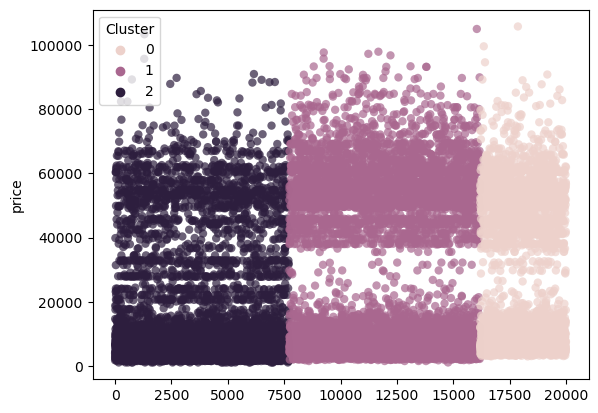

In [53]:
sns.scatterplot(x = df_export_subset.index, y = 'price', hue = 'Cluster', data = df_export_subset.sort_values("Cluster", ascending = False), linewidth=0, alpha = 0.7)
plt.show()